# 線型単回帰でうまく行かない例

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchviz import make_dot
import japanize_matplotlib
import torch.optim as optim

## データの入力

In [2]:
np.random.seed(123)
x = np.random.randn(100,1)
y = x**2 + np.random.randn(100,1)*0.1

x_train = x[:50,:]
x_test = x[50:,:]
y_train = y[:50,:]
y_test = y[50:,:]

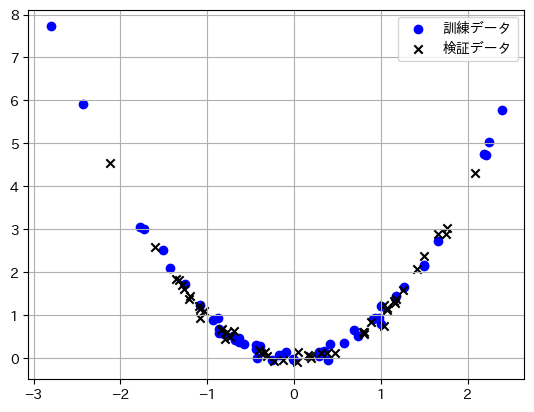

In [3]:
plt.scatter(x_train,y_train,c='b',label='訓練データ')
plt.scatter(x_test,y_test,c='k',marker='x',label='検証データ')
plt.grid(True)
plt.legend()
plt.show()

## 線型回帰モデルの場合

In [4]:
# テンソルに変換
X_train = torch.tensor(x_train).float()
X_test = torch.tensor(x_test).float()
Y_train = torch.tensor(y_train).float()
Y_test = torch.tensor(y_test).float()

# 重みとバイアスの初期化
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

# 学習の設定
num_epochs = 500
lr = 0.001

# 学習の履歴を保存するための配列
history = np.zeros((0, 2))  # 0行2列の配列

# 最適化アルゴリズムの設定
optimizer = optim.SGD([W, B], lr=lr)

<details>
<summary>上のコードの解説</summary>
このコードは、PyTorchを使用して単純な線形回帰モデルを定義しています。

WとBは、それぞれ重みとバイアスを表すテンソルであり、requires_grad=Trueを指定することで、自動微分による勾配計算が可能になります。

num_epochsはエポック数、lrは学習率を表しています。

historyは、学習の履歴を保存するための配列です。ここでは、0行2列の配列を作成しています。

最適化アルゴリズムには、確率的勾配降下法（SGD）を使用しています。optim.SGDを使用して、パラメータWとBを更新するための最適化器を定義しています。
</details>

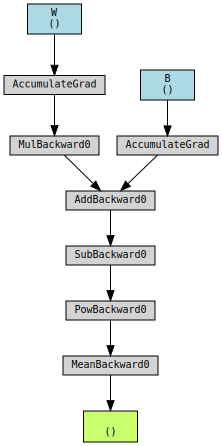

In [5]:
# Xに対して、重みWとバイアスBを用いた線形回帰の予測値を返す関数
def pred(X):
    return W*X+B

# 二乗誤差を計算する関数
def mse(Yp,Y):
    loss=((Yp-Y)**2).mean()
    return loss

# トレーニングデータX_trainに対して、予測値Ypを計算する
Yp=pred(X_train)

# トレーニングデータX_train、正解データY_trainを用いて、二乗誤差を計算する
loss=mse(Yp,Y_train)

# 重みWとバイアスBの値をparamsに格納する
params = {'W':W,'B':B} 

# グラフの生成
g=make_dot(loss,params=params)

# グラフの表示
display(g)

In [6]:
for epoch in range(num_epochs):
    # 予測値の計算
    Yp = pred(X_train)
    
    # 損失関数の計算
    loss = mse(Yp, Y_train)
    
    # 勾配の計算
    loss.backward()
    
    # パラメータの更新
    optimizer.step()
    
    # 勾配の初期化
    optimizer.zero_grad()
    
    # 学習の履歴を保存
    if(epoch % 10 == 0):
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))

# 学習結果の表示
print('W = ', W.data.numpy())
print('B = ', B.data.numpy())
print(f'初期状態: 損失:{history[0,1]:.4f}')
print(f'最終状態: 損失:{history[-1,1]:.4f}')

W =  0.2839339
B =  1.2660173
初期状態: 損失:4.6571
最終状態: 損失:3.3214


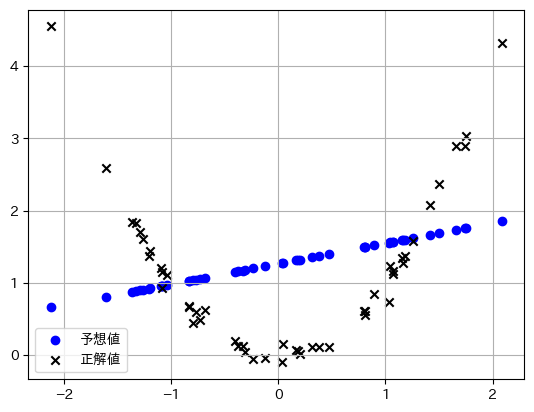

In [7]:
# グラフの描画
plt.scatter(x_test,pred(X_test).detach().numpy(),c='b',label='予想値')
plt.scatter(x_test,y_test,c='k',marker='x',label='正解値')
plt.grid(True)
plt.legend()
plt.show()